# Imports

In this section the import libraries required.

In [159]:
import pandas as pd
import numpy as np 
from faker import Faker
from enum import Enum
from typing import List, Any, Tuple, Dict
import string
import uuid
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable, ALL, FRAME
from html import escape
from scipy.stats import bernoulli
import base64
import ipywidgets as widgets

In [160]:
%load_ext autoreload
%autoreload 2
from synthetic_data_generation.generators import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Global variables and control definition

In [161]:
# User number 
NUM_USERS = 500
# Generate age range 
age_range = person_entity.get("age_range")
age_probabilities = dict(zip(age_range, [1/len(age_range) for i in range(len(age_range))]))
print(age_probabilities)
# Male and female distribution
gender_probabilities = dict(zip(person_entity.get("clinical_gender"), [0.5, 0.5]))
# Generate BMI values
BMI_values = ["underweight", "healthy", "overweight", "obesity"]
BMI_prob = [0.25, 0.25, 0.25, 0.25]
BMI_probabilities = dict(zip(BMI_values, BMI_prob))
# Allergy array and probabilities
allergies = ["cow's milk", "eggs", "peanut", "soy",
                 "fish", "tree nuts", "shellfish", "wheat", "None"]
allergies_prob = [0.075, 0.075, 0.075,
                      0.075, 0.075, 0.075, 0.075, 0.075, 0.4]
allergies_probability_dict = dict(zip(allergies, allergies_prob))
 # generate different probabilities for the flexible
food_restrictions=["vegan_observant",
                                                "vegetarian_observant",
                                                "halal_observant",
                                                "kosher_observant",
                                                "None"]
flexi_probabilities = {
    "flexi_vegie": dict(zip(food_restrictions, [0.6, 0.2, 0.05, 0.05, 0.1])),
     # "flexi_vegetarian" : dict(zip(food_restrictions,[NN, 0.6, 0.05, 0.05, 0.1])),
    "flexi_vegetarian": dict(zip(food_restrictions, [0.0, 0.6, 0.05, 0.05, 0.3])),
    "flexi_halal": dict(zip(food_restrictions, [0.1, 0.2, 0.6, 0.0, 0.1])),
    "flexi_kosher": dict(zip(food_restrictions, [0.1, 0.1, 0.1, 0.6, 0.1]))
    }

# Food restrictions probabilities
food_restrictions = ["vegan_observant", "vegetarian_observant",
                        "halal_observant", "kosher_observant", "flexi_observant", "None"]
food_restriction_probs = [0.2, 0.3, 0.05, 0.05, 0.1, 0.3]
food_restriction_probability_dict = dict(zip(food_restrictions, food_restriction_probs))
# meals probabilities 
meals_proba = {
    "breakfast": 0.80,
    "morning snacks": 0.45,
    "afternoon snacks": 0.40,
    "lunch": 0.95,
    "dinner": 0.85
}

{'20-29': 0.125, '30-39': 0.125, '40-49': 0.125, '50-59': 0.125, '60-69': 0.125, '70-79': 0.125, '80-89': 0.125, '90-100': 0.125}


In [162]:
# set seed for random generator 
np.random.seed(0)

# 2. Generate Personal Data 

In this section the personal user data is generated. 

In [4]:
df_personal_data = generate_personal_data(num_users=NUM_USERS, 
                                          person_entity=person_entity, 
                                          gender_probabilities=gender_probabilities)

In [5]:
df_personal_data.head(7)

userId      username  password                     email      name  \
0   williama97c   williamaa58  C1qyyqwW     william.cole@fake.com   William   
1    williea023    willie8372  e76qS90Q     willie.davis@fake.com    Willie   
2      cody9f0a      cody9712  sBs3Sgr4      cody.keller@fake.com      Cody   
3      tonyb1d9      tony9a51  yrvrOhwo       tony.ramos@fake.com      Tony   
4     davidaa10     davida7ed  L14nkRKq      david.moore@fake.com     David   
5      mary8532      maryb399  to0GJ6Q0       mary.glenn@fake.com      Mary   
6  nicholas8fc5  nicholas85d7  5VMZSLSx  nicholas.thomas@fake.com  Nicholas   

  surname clinical_gender current_location age_range  \
0    Cole               M           nso_ZA     40-49   
1   Davis               M            is_IS     50-59   
2  Keller               M           lzh_TW     50-59   
3   Ramos               M            is_IS    90-100   
4   Moore               M            da_DK     60-69   
5   Glenn               F           fil_PH     30-39   
6  Thomas               M            ha_NG     70-79   

              living_country         country_of_origin  
0                   Anguilla                     Chile  
1  Saint Pierre and Miquelon               El Salvador  
2                  Hong Kong                   Mayotte  
3                   Bulgaria          Papua New Guinea  
4                       Iraq                   Lesotho  
5                 Montenegro                   Myanmar  
6                      Ghana  Turks and Caicos Islands

In [194]:
# save data 
df_personal_data.to_csv("personal_profiles.csv", index=False)

# 3. Generate user status 
Generate for each user the XXX data. 

In [6]:
df_user_entity = generate_user_life_style_data(df_personal_data["userId"].tolist(),
                                               user_entity=user_entity,
                                               df_personal_data=df_personal_data,
                                               BMI_probabilities_dict=BMI_probabilities)

In [7]:
df_user_entity.head(6)

userId current_working_status marital_status         life_style  \
0  williama97c          Self-employee         Single          Sedentary   
1   williea023       Full-time-worker         Single  Moderately active   
2     cody9f0a          Self-employee        Married          Sedentary   
3     tonyb1d9             Unemployed        Married  Moderately active   
4    davidaa10             Unemployed        Married          Sedentary   
5     mary8532       Full-time-worker         Single  Moderately active   

   weight ethnicity  height          BMI  
0   57.03     White     178  underweight  
1   69.56    Latino     182      healthy  
2   47.88     Asian     151      healthy  
3   79.97     White     169   overweight  
4   62.16     Black     149   overweight  
5   92.48     White     170      obesity

In [209]:
df_user_entity.to_csv("user_entity.csv", index=False)

# 4. Generate health conditions (Allergies)

Generate allergies based on probabilities. 

In [8]:
df_health_conditions = generate_health_condition_data(df_personal_data["userId"].tolist(),
                                                      allergies_probability_dict=allergies_probability_dict)

In [9]:
df_health_conditions.head(6)

userId allergy
0  williama97c    eggs
1   williea023  peanut
2     cody9f0a    None
3     tonyb1d9    fish
4    davidaa10    None
5     mary8532    None

In [216]:
df_health_conditions.to_csv("health_conditions.csv", index=False)

# 5. Generate user goals

Generate user's nutrition goals. 

In [10]:
df_user_goals = generate_user_goals(df_personal_data["userId"].tolist(), 
                                    df_user_entity=df_user_entity)

In [11]:
df_user_goals.head(6)

userId nutrition_goal
0  williama97c    gain_weight
1   williea023   maintain_fit
2     cody9f0a   maintain_fit
3     tonyb1d9    lose_weight
4    davidaa10    lose_weight
5     mary8532    lose_weight

# 6. Generate cultural factors 

Generate cultural preferences and restrictions based on probability distribution.

In [19]:
df_cultural_factors = generate_cultural_data(df_personal_data["userId"].tolist(), 
                                             food_restriction_probability_dict=food_restriction_probability_dict,
                                             flexi_probability_dict=flexi_probabilities)

In [20]:
df_cultural_factors[df_cultural_factors["cultural_factor"] == "flexi_observant"].head(4)

userId  cultural_factor probabilities
15   martinaf8b  flexi_observant  flexi_kosher
29  michaelae7c  flexi_observant   flexi_vegie
32    aliceb2a2  flexi_observant   flexi_vegie
33    sally8627  flexi_observant   flexi_vegie

In [233]:
df_cultural_factors.to_csv("cultural_factors.csv", index=False)

# 7. Generate preferences

Generate time preferences for food consumption

In [21]:
df_preferences = generate_cultural_data(df_personal_data["userId"].tolist(), 
                                             food_restriction_probability_dict=food_restriction_probability_dict,
                                             flexi_probability_dict=flexi_probabilities)

In [22]:
df_preferences.head(6)

userId       cultural_factor probabilities
0  williama97c  vegetarian_observant          None
1   williea023  vegetarian_observant          None
2     cody9f0a                  None          None
3     tonyb1d9                  None          None
4    davidaa10       vegan_observant          None
5     mary8532  vegetarian_observant          None

In [239]:
df_preferences.to_csv("preferences.csv", index=False)

# 8. Generate Therapy (Diet planning)

Based on Harris-Benedict equations:
* For men: 
  $BMR = 13.397W + 4.799H - 5.677A + 88.362$
* For women: 
  $BMR = 9.247W + 3.098H - 4.330A + 447.593$

In [41]:
df_treatment, df_user_data = generate_therapy_data(df_personal_data["userId"].tolist(),
                                     df_personal_data=df_personal_data,
                                     df_user_entity=df_user_entity,
                                     df_user_goals=df_user_goals)

In [27]:
df_treatment.head(4)

userId  projected_daily_calories
0  williama97c                    2242.0
1   williea023                    2728.0
2     cody9f0a                    1371.0
3     tonyb1d9                    1970.0

In [368]:
df_treatment.to_csv("projected_calories.csv", index=False)

In [369]:
df_treatment["projected_daily_calories"].min(axis=0)

820.0

# 9. Data Analysis
Short data analysis and graphics.

In [371]:
df_personal_data.head(3)

userId  username  password                  email  name  surname  \
0  chad8da2  chadadde  R7JmXrN3    chad.booth@fake.com  Chad    Booth   
1  luke8e49  lukea2d2  V1mMUhUH      luke.day@fake.com  Luke      Day   
2  taraac5b  tarabb19  imjOJt6f  tara.herring@fake.com  Tara  Herring   

  clinical_gender current_location age_range   living_country  \
0               M           lzh_TW     30-39           Jordan   
1               M            ky_KG     20-29           Panama   
2               F            sd_IN     50-59  North Macedonia   

  country_of_origin  
0        Tajikistan  
1       Netherlands  
2            France

In [372]:
df_user_entity.head(4)

userId current_working_status marital_status         life_style  weight  \
0   chad8da2       Full-time-worker        Married  Moderately active   54.43   
1   luke8e49             Unemployed         Single          Sedentary   91.73   
2   taraac5b          Self-employee        Married     Lightly active   94.67   
3  megan8942       Full-time-worker         Single        Very active   49.80   

  ethnicity  height         BMI  
0     Asian     161     healthy  
1     White     181  overweight  
2    Latino     172     obesity  
3     Asian     154     healthy

In [373]:
df_health_conditions.head(3)

userId     allergy
0  chad8da2  cow's milk
1  luke8e49   tree nuts
2  taraac5b        fish

In [374]:
users = df_user_entity[df_user_entity["BMI"] == "underweight"]["userId"]

In [375]:
vals = df_health_conditions["allergy"].value_counts()

In [376]:
weight_condition = df_user_entity["BMI"].value_counts()

In [377]:
weight_condition = df_user_entity["BMI"].value_counts()
for condition in weight_condition.index:
    print(condition)

overweight
obesity
healthy
underweight


# 10. Simulation 

Simulate te interactions between users and the system. 

In [31]:
probability_transition_matrix = np.array([[0.65, 0.35, 0.0, 0.0], 
              [0.05, 0.80, 0.15, 0.0],
              [0.0, 0.28, 0.67, 0.05],
              [0.0, 0.0, 0.35, 0.65]
              ])

In [28]:
counts = df_user_entity.groupby(by="BMI").count()["userId"]

In [34]:
transition_matrix = simulate_final_result(probability_matrix=probability_transition_matrix, 
                                          samples_size_list=dict(counts.items()), 
                                          state_list=counts.index)

In [35]:
df_user_entity

userId current_working_status marital_status         life_style  \
0    williama97c          Self-employee         Single          Sedentary   
1     williea023       Full-time-worker         Single  Moderately active   
2       cody9f0a          Self-employee        Married          Sedentary   
3       tonyb1d9             Unemployed        Married  Moderately active   
4      davidaa10             Unemployed        Married          Sedentary   
..           ...                    ...            ...                ...   
495    emily89f5       Full-time-worker         Single  Moderately active   
496    scott9017       Half-time-worker         Single          Sedentary   
497  stanley8db4       Full-time-worker        Married        Very active   
498     lisaa8d7       Full-time-worker         Single  Moderately active   
499    donna95d3       Half-time-worker        Married  Moderately active   

     weight ethnicity  height          BMI  
0     57.03     White     178  underweight  
1     69.56    Latino     182      healthy  
2     47.88     Asian     151      healthy  
3     79.97     White     169   overweight  
4     62.16     Black     149   overweight  
..      ...       ...     ...          ...  
495   78.88     Black     157      obesity  
496   79.97    Latino     169   overweight  
497   59.62     Asian     182  underweight  
498   70.33    Latino     183      healthy  
499   74.39     Black     163   overweight  

[500 rows x 8 columns]

In [42]:
df_user_data.head(3)

userId nutrition_goal clinical_gender age_range         life_style  \
0  williama97c    gain_weight               M     40-49          Sedentary   
1   williea023   maintain_fit               M     50-59  Moderately active   
2     cody9f0a   maintain_fit               M     50-59          Sedentary   

   weight  height  
0   57.03     178  
1   69.56     182  
2   47.88     151

In [43]:
df_user_join = df_user_data.merge(df_treatment, on="userId")
df_user_join = df_user_join.merge(df_cultural_factors,  on="userId")
df_user_join = df_user_join.merge(df_health_conditions,  on="userId")
df_user_join = df_user_join.merge(df_user_entity[["userId", "BMI"]],  on="userId")

In [278]:
df_user_join.to_csv("simulation_ready_user_data.csv", index=False, sep="|")

In [54]:
# load recipes data 
df_recipes = pd.read_csv("processed_recipes_dataset.csv", sep="|")

In [55]:
df_recipes_filter = df_recipes[df_recipes["calories"]>=0.0]

In [164]:
print(df_recipes_filter.head(4))

                     title                                           raw_text  \
0              Fruit Salad  1. Fruit Salad: 70 calories per portion, 4 por...   
1           Vegan Pancakes  2. Vegan Pancakes: 150 calories per portion, 4...   
2   Overnight Chia Pudding  3. Overnight Chia Pudding: 200 calories per po...   
3            Avocado Toast  4. Avocado Toast: 250 calories per portion, 2 ...   

   meal_type cultural_restriction  calories                allergies  
0  breakfast                vegan      70.0     contains fruits only  
1  breakfast                vegan     150.0                           
2  breakfast                vegan     200.0  contains nuts (almonds)  
3  breakfast                vegan     250.0                           


In [174]:
df_recipes_filter.query("cultural_restriction =='vegan' |  cultural_restriction =='vegetarian'")

title  \
0                         Fruit Salad   
1                      Vegan Pancakes   
2              Overnight Chia Pudding   
3                       Avocado Toast   
4                      Vegan Omelette   
...                               ...   
5095                 Ratatouille Tart   
5096    Penne alla Vodka with Spinach   
5097     Thai Green Curry Noodle Soup   
5098   Roasted Vegetable Quinoa Bowls   
5099        Eggplant Parmesan Sliders   

                                               raw_text  meal_type  \
0     1. Fruit Salad: 70 calories per portion, 4 por...  breakfast   
1     2. Vegan Pancakes: 150 calories per portion, 4...  breakfast   
2     3. Overnight Chia Pudding: 200 calories per po...  breakfast   
3     4. Avocado Toast: 250 calories per portion, 2 ...  breakfast   
4     5. Vegan Omelette: 300 calories per portion, 1...  breakfast   
...                                                 ...        ...   
5095  96. Ratatouille Tart: 300kcals per portion, 4 ...     dinner   
5096  97. Penne alla Vodka with Spinach: 400kcals pe...     dinner   
5097  98. Thai Green Curry Noodle Soup: 550kcals per...     dinner   
5098  99. Roasted Vegetable Quinoa Bowls: 350kcals p...     dinner   
5099  100. Eggplant Parmesan Sliders: 300kcals per p...     dinner   

     cultural_restriction  calories                allergies  
0                   vegan      70.0     contains fruits only  
1                   vegan     150.0                           
2                   vegan     200.0  contains nuts (almonds)  
3                   vegan     250.0                           
4                   vegan     300.0  contains chickpea flour  
...                   ...       ...                      ...  
5095           vegetarian     300.0                           
5096           vegetarian     400.0                           
5097           vegetarian     550.0                           
5098           vegetarian     350.0                           
5099           vegetarian     300.0                           

[3500 rows x 6 columns]

In [56]:
df_user_join

userId nutrition_goal clinical_gender age_range         life_style  \
0    williama97c    gain_weight               M     40-49          Sedentary   
1     williea023   maintain_fit               M     50-59  Moderately active   
2       cody9f0a   maintain_fit               M     50-59          Sedentary   
3       tonyb1d9    lose_weight               M    90-100  Moderately active   
4      davidaa10    lose_weight               M     60-69          Sedentary   
..           ...            ...             ...       ...                ...   
495    emily89f5    lose_weight               F     80-89  Moderately active   
496    scott9017    lose_weight               M     70-79          Sedentary   
497  stanley8db4    gain_weight               M     20-29        Very active   
498     lisaa8d7   maintain_fit               F    90-100  Moderately active   
499    donna95d3    lose_weight               F     50-59  Moderately active   

     weight  height  projected_daily_calories       cultural_factor  \
0     57.03     178                    2242.0  vegetarian_observant   
1     69.56     182                    2728.0                  None   
2     47.88     151                    1371.0       vegan_observant   
3     79.97     169                    1970.0                  None   
4     62.16     149                    1021.0                  None   
..      ...     ...                       ...                   ...   
495   78.88     157                    1735.0       flexi_observant   
496   79.97     169                    1354.0      kosher_observant   
497   59.62     182                    3576.0                  None   
498   70.33     183                    2163.0      kosher_observant   
499   74.39     163                    1919.0                  None   

    probabilities allergy          BMI  
0            None    eggs  underweight  
1            None  peanut      healthy  
2            None    None      healthy  
3            None    fish   overweight  
4            None    None   overweight  
..            ...     ...          ...  
495   flexi_vegie    None      obesity  
496          None    None   overweight  
497          None  peanut  underweight  
498          None    None      healthy  
499          None    None   overweight  

[500 rows x 12 columns]

In [57]:
df_recipes_filter

title  \
0                                            Fruit Salad   
1                                         Vegan Pancakes   
2                                 Overnight Chia Pudding   
3                                          Avocado Toast   
4                                         Vegan Omelette   
...                                                  ...   
10195   Mexican stuffed bell peppers with ground beef...   
10196   Caprese quinoa salad with grilled chicken - 3...   
10197   Baked coconut shrimp with mango salsa and jas...   
10198   One-pot creamy chicken and mushroom pasta - 4...   
10199   Stuffed bell peppers with couscous, chickpeas...   

                                                raw_text  meal_type  \
0      1. Fruit Salad: 70 calories per portion, 4 por...  breakfast   
1      2. Vegan Pancakes: 150 calories per portion, 4...  breakfast   
2      3. Overnight Chia Pudding: 200 calories per po...  breakfast   
3      4. Avocado Toast: 250 calories per portion, 2 ...  breakfast   
4      5. Vegan Omelette: 300 calories per portion, 1...  breakfast   
...                                                  ...        ...   
10195  96. Mexican stuffed bell peppers with ground b...     dinner   
10196  97. Caprese quinoa salad with grilled chicken ...     dinner   
10197  98. Baked coconut shrimp with mango salsa and ...     dinner   
10198  99. One-pot creamy chicken and mushroom pasta ...     dinner   
10199  100. Stuffed bell peppers with couscous, chick...     dinner   

      cultural_restriction  calories                allergies  
0                    vegan      70.0     contains fruits only  
1                    vegan     150.0                      NaN  
2                    vegan     200.0  contains nuts (almonds)  
3                    vegan     250.0                      NaN  
4                    vegan     300.0  contains chickpea flour  
...                    ...       ...                      ...  
10195                  NaN     450.0         contains lactose  
10196                  NaN     350.0         contains lactose  
10197                  NaN     420.0       contains shellfish  
10198                  NaN     480.0          contains gluten  
10199                  NaN     350.0         contains lactose  

[6300 rows x 6 columns]

In [58]:
df_recipes_filter.sample(10)

title  \
1022    Vegan Chocolate Chip Cookies - 120 kcals per ...   
4131    Veggie Burger - 300kcals per portion, 2 porti...   
7518    Baked avocado eggs with bacon (380 calories p...   
10186   Beef and broccoli pasta with creamy garlic sa...   
2302    Chickpea Stew - 250 calories per portion, 6 p...   
8686    Stuffed zucchini boats with quinoa and vegeta...   
1034    Vegan Zucchini Bread - 150 kcals per portion,...   
4827    Butternut Squash and Sage Pasta - 450 calorie...   
8330                 Caprese skewers with balsamic glaze   
8665                                         Vegan chili   

                                                raw_text         meal_type  \
1022   23. Vegan Chocolate Chip Cookies - 120 kcals p...  afternoon snacks   
4131   32. Veggie Burger - 300kcals per portion, 2 po...             lunch   
7518   19. Baked avocado eggs with bacon (380 calorie...         breakfast   
10186  87. Beef and broccoli pasta with creamy garlic...            dinner   
2302   3. Chickpea Stew - 250 calories per portion, 6...            dinner   
8686   87. Stuffed zucchini boats with quinoa and veg...             lunch   
1034   35. Vegan Zucchini Bread - 150 kcals per porti...  afternoon snacks   
4827   28. Butternut Squash and Sage Pasta - 450 calo...            dinner   
8330   31. Caprese skewers with balsamic glaze: 150kc...  afternoon snacks   
8665   66. Vegan chili: 300 calories per portion, 4 p...             lunch   

      cultural_restriction  calories                allergies  
1022                 vegan     120.0                      NaN  
4131            vegetarian     300.0                      NaN  
7518                kosher     380.0            contains eggs  
10186                  NaN     480.0          contains gluten  
2302                 vegan     250.0                      NaN  
8686                kosher     350.0                      NaN  
1034                 vegan     150.0                      NaN  
4827            vegetarian     450.0  contains gluten (Italy)  
8330                kosher     150.0                      NaN  
8665                kosher     300.0                      NaN

In [59]:
df_recipes_filter["allergies"].fillna("")

0           contains fruits only
1                               
2        contains nuts (almonds)
3                               
4        contains chickpea flour
                  ...           
10195           contains lactose
10196           contains lactose
10197         contains shellfish
10198            contains gluten
10199           contains lactose
Name: allergies, Length: 6300, dtype: object

In [60]:
df_user_join["allergy"].value_counts()

allergy
None          189
peanut         48
fish           42
shellfish      42
cow's milk     41
tree nuts      39
soy            34
eggs           33
wheat          32
Name: count, dtype: int64

In [61]:
df_user_join

userId nutrition_goal clinical_gender age_range         life_style  \
0    williama97c    gain_weight               M     40-49          Sedentary   
1     williea023   maintain_fit               M     50-59  Moderately active   
2       cody9f0a   maintain_fit               M     50-59          Sedentary   
3       tonyb1d9    lose_weight               M    90-100  Moderately active   
4      davidaa10    lose_weight               M     60-69          Sedentary   
..           ...            ...             ...       ...                ...   
495    emily89f5    lose_weight               F     80-89  Moderately active   
496    scott9017    lose_weight               M     70-79          Sedentary   
497  stanley8db4    gain_weight               M     20-29        Very active   
498     lisaa8d7   maintain_fit               F    90-100  Moderately active   
499    donna95d3    lose_weight               F     50-59  Moderately active   

     weight  height  projected_daily_calories       cultural_factor  \
0     57.03     178                    2242.0  vegetarian_observant   
1     69.56     182                    2728.0                  None   
2     47.88     151                    1371.0       vegan_observant   
3     79.97     169                    1970.0                  None   
4     62.16     149                    1021.0                  None   
..      ...     ...                       ...                   ...   
495   78.88     157                    1735.0       flexi_observant   
496   79.97     169                    1354.0      kosher_observant   
497   59.62     182                    3576.0                  None   
498   70.33     183                    2163.0      kosher_observant   
499   74.39     163                    1919.0                  None   

    probabilities allergy          BMI  
0            None    eggs  underweight  
1            None  peanut      healthy  
2            None    None      healthy  
3            None    fish   overweight  
4            None    None   overweight  
..            ...     ...          ...  
495   flexi_vegie    None      obesity  
496          None    None   overweight  
497          None  peanut  underweight  
498          None    None      healthy  
499          None    None   overweight  

[500 rows x 12 columns]

In [62]:
# randomize the meals and the percentages 
df_user_join["userId"]

0      williama97c
1       williea023
2         cody9f0a
3         tonyb1d9
4        davidaa10
          ...     
495      emily89f5
496      scott9017
497    stanley8db4
498       lisaa8d7
499      donna95d3
Name: userId, Length: 500, dtype: object

In [63]:
meals_plan = generate_meals_plan_per_user(df_user_join["userId"].tolist(), meals_proba)

In [67]:
simulation_results = generate_recommendations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter,
                                          meals_plan=meals_plan,
                                          flexi_probabilities_dict=flexi_probabilities)

/home/victor/Documents/Expectation_data_generation/src/synthetic_data_generation/generators.py:501: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_calories = user_db.projected_daily_calories


Simulating for user: williama97c
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: williea023
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: cody9f0a
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: tonyb1d9
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: davidaa10
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: mary8532
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: nicholas8fc5
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: beckyb325
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: carlosb29f
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snac

In [98]:
simulation_results['brendaa599']

breakfast_calories  morning snacks_calories  afternoon snacks_calories  \
1                 350.0                        0                          0   
2                 200.0                        0                          0   
3                 450.0                        0                          0   
4                 300.0                        0                          0   
5                 400.0                        0                          0   
..                  ...                      ...                        ...   
361               300.0                        0                          0   
362               300.0                        0                          0   
363               250.0                        0                          0   
364               150.0                        0                          0   
365                 NaN                        0                          0   

     lunch_calories  dinner_calories  \
1             120.0            300.0   
2              20.0            180.0   
3              20.0            220.0   
4              20.0            300.0   
5              20.0            300.0   
..              ...              ...   
361            20.0            200.0   
362            20.0            400.0   
363           100.0            350.0   
364           550.0            150.0   
365             NaN              NaN   

                                             breakfast morning snacks  \
1              Sweet Potato and Spinach Breakfast Hash            N/A   
2                                Papaya Boat with Lime            N/A   
3     Quiche Lorraine with bacon and cheese (450kca...            N/A   
4     Spinach and feta pastry turnovers (300kcals p...            N/A   
5     Nigerian plantain porridge - 400 calories per...            N/A   
..                                                 ...            ...   
361   Chia pudding with mixed berries - 300 calorie...            N/A   
362   Cheese omelette - 300 calories per portion, 1...            N/A   
363                         Vegan Breakfast Quesadilla            N/A   
364                Vegan Peanut Butter Banana Smoothie            N/A   
365                                                NaN            N/A   

    afternoon snacks                                              lunch  \
1                N/A   Caprese Salad - 120kcals per portion, 2 porti...   
2                N/A                                  Moroccan Mint Tea   
3                N/A                                  Moroccan Mint Tea   
4                N/A                                  Moroccan Mint Tea   
5                N/A                                  Moroccan Mint Tea   
..               ...                                                ...   
361              N/A                                  Moroccan Mint Tea   
362              N/A                                  Moroccan Mint Tea   
363              N/A                                      Israeli salad   
364              N/A                         Portobello Mushroom Burger   
365              N/A                                                NaN   

                                                dinner  
1     Vegetarian Chili - 300 calories per portion, ...  
2                                          Lentil Soup  
3                        Quinoa and Vegetable Stir Fry  
4     Quinoa-stuffed mushrooms – 300 calories per p...  
5     Greek Spanakopita - 300 calories/portion, 4 p...  
..                                                 ...  
361   Caprese Stuffed Portobello Mushrooms - 200 ca...  
362                 Honey Glazed Salmon with Asparagus  
363                                   Tofu Pad Kra Pao  
364   Greek Salad with Tofu - 150 calories/portion,...  
365                                                NaN  

[365 rows x 10 columns]

In [124]:
def generate_simulations(df_user, transition_matrix, df_recipes_db, days_to_simulated = 365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    simulation_results = {}
    df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")
    for i in range(len(df_user)):
        try:
            user_db = df_user.iloc[i, :]
            current_state = user_db.BMI
            # possible_transition = list(transition_matrix[current_state].keys())
            # if len(possible_transition) > 2:
            #     next_state = np.random.choice(possible_transition, size=1)
            # else: 
            #     next_state = np.random.choice(possible_transition, size=1)
            #     print(f"User next state: {next_state}")
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=[f"{k}_calories" for k in meals_dict.keys()]+list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # allergy restrictions filter
            allergies_factor = user_db.allergy
            if allergies_factor != "None":
                filtered_recipe_db = df_recipes_db[df_recipes_db["allergies"].str.contains(allergies_factor)]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = filtered_recipe_db[filtered_recipe_db["cultural_restriction"] == cultural_factor]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            for meal_tp in list(meals_dict.keys()):
                # generate recommendations 
                #print(f"meal {meal_tp}")
                daily_calories = user_db.projected_daily_calories
                meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                #print(meal_db.shape)
                if meal_db.shape[0] == 0:
                    meal_db = filtered_recipe_db
                max_calories_meal = daily_calories * meals_dict[meal_tp]
                possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal+np.random.normal(0, 50)]
                if possible_recipes.shape[0] == 0:
                    possible_recipes = meal_db
                choose_recipes = possible_recipes.sample(days_to_simulated, replace=True)
                df_recommendations[meal_tp] = choose_recipes["title"].values
                df_recommendations[f"{meal_tp}_calories"] = choose_recipes["calories"].values
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [ ]:
#TODO:Implement a flexible class which are dedicate to one class but with a certain probability 

In [125]:
simulation_results = generate_simulations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter)

/tmp/ipykernel_2023382/712055419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")


Simulating for user: helen8f67
Simulating for user: staceyb817
Simulating for user: miss8a35
Simulating for user: mary97cb
Simulating for user: daniel9360
Simulating for user: barbara9dbf
Simulating for user: charles9915
Simulating for user: destinya7e0
Simulating for user: melaniea5f8
Simulating for user: john83f8
Simulating for user: makayla8d14
Simulating for user: stacy8e55
Simulating for user: samantha8a06
Simulating for user: beckyb845
Simulating for user: cory867d
Simulating for user: andrew8409
Simulating for user: gabriel816d
Simulating for user: feliciabd22
Simulating for user: maryb1ae
Simulating for user: michelle8a9a
Simulating for user: julie80b1
Simulating for user: courtneyae6c
Simulating for user: williamb74a
Simulating for user: mollyb459
Simulating for user: jareda772
Simulating for user: tiffany9e1a
Simulating for user: tyler9da7
Simulating for user: grace825f
Simulating for user: alyssaba8c
Simulating for user: ronaldb1cb
Simulating for user: anthony898a
Simulating

<Axes: xlabel='weight', ylabel='Density'>

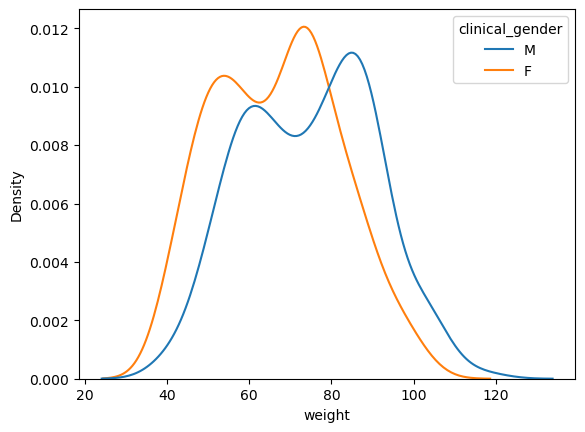

In [78]:
sns.kdeplot(data=df_user_data, x="weight", hue="clinical_gender")

In [ ]:
sns.countplot(data=df_user_join, x="user")

In [79]:
len(df_recipes_filter["title"].unique())

5149

In [80]:
df_user_join

userId nutrition_goal clinical_gender age_range         life_style  \
0    williama97c    gain_weight               M     40-49          Sedentary   
1     williea023   maintain_fit               M     50-59  Moderately active   
2       cody9f0a   maintain_fit               M     50-59          Sedentary   
3       tonyb1d9    lose_weight               M    90-100  Moderately active   
4      davidaa10    lose_weight               M     60-69          Sedentary   
..           ...            ...             ...       ...                ...   
495    emily89f5    lose_weight               F     80-89  Moderately active   
496    scott9017    lose_weight               M     70-79          Sedentary   
497  stanley8db4    gain_weight               M     20-29        Very active   
498     lisaa8d7   maintain_fit               F    90-100  Moderately active   
499    donna95d3    lose_weight               F     50-59  Moderately active   

     weight  height  projected_daily_calories       cultural_factor  \
0     57.03     178                    2242.0  vegetarian_observant   
1     69.56     182                    2728.0                  None   
2     47.88     151                    1371.0       vegan_observant   
3     79.97     169                    1970.0                  None   
4     62.16     149                    1021.0                  None   
..      ...     ...                       ...                   ...   
495   78.88     157                    1735.0       flexi_observant   
496   79.97     169                    1354.0      kosher_observant   
497   59.62     182                    3576.0                  None   
498   70.33     183                    2163.0      kosher_observant   
499   74.39     163                    1919.0                  None   

    probabilities allergy          BMI  
0            None    eggs  underweight  
1            None  peanut      healthy  
2            None    None      healthy  
3            None    fish   overweight  
4            None    None   overweight  
..            ...     ...          ...  
495   flexi_vegie    None      obesity  
496          None    None   overweight  
497          None  peanut  underweight  
498          None    None      healthy  
499          None    None   overweight  

[500 rows x 12 columns]

In [81]:
df_user_join.to_csv("df_user_join.csv")

In [82]:
bernoulli.rvs(0.6, size=1)[0]

0

In [96]:
from IPython.display import HTML, display

In [83]:
table = HTMLTable()

In [84]:
table.add_row("<tr><th style=\"text-align: left;\"><FONT COLOR=\"#ff0000\"> Tracking simulation: {} days</FONT></th></tr>".format(365))
table.add_row("<tr><th style=\"text-align: left;\">Total users: {}</th></tr>".format(500))
table.add_row("<tr><td colspan=\"2\">Clinical gender male: 50%</td><td colspan=\"2\">Clinical gender female: 50%</td></tr>")
table.add_row("<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>")
table.add_row("<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>")
table.add_row("<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>")
table.add_row("<tr>Nutrition summary</tr>")

In [85]:
print(table.render())

<table border="1">
        <tr><th style="text-align: left;"><FONT COLOR="#ff0000"> Tracking simulation: 365 days</FONT></th></tr>
<tr><th style="text-align: left;">Total users: 500</th></tr>
<tr><td colspan="2">Clinical gender male: 50%</td><td colspan="2">Clinical gender female: 50%</td></tr>
<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>
<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>
<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>
<tr>Nutrition summary</tr>
    </table>


In [86]:
table

In [87]:
from IPython import display
from IPython.display import HTML

In [88]:
HTML(table.render())

In [89]:
a = df_user_join["clinical_gender"].value_counts()

In [90]:
for x, val in a.items():
    print(x, val)

F 257
M 243


In [99]:
a = df_user_join.groupby(by=["BMI", "clinical_gender"]).count()

In [100]:
a.xs("healthy", level=0)["userId"]

clinical_gender
F    72
M    74
Name: userId, dtype: int64

In [132]:
df_groups = df_user_join.groupby(by=["BMI", "cultural_factor"])

In [133]:
df_counts = df_groups.count()

In [134]:
allergy_index = list(df_counts.xs("healthy", level=0).index)
allergy_index

['None',
 'flexi_observant',
 'halal_observant',
 'kosher_observant',
 'vegan_observant',
 'vegetarian_observant']

In [135]:
# Health condition
weight_condition = df_user_join["BMI"].value_counts()
weight_condition_gender = df_user_join.groupby(
    by=["BMI", "clinical_gender"]).count()
temp_row = []
for idx, item in weight_condition.items():
    weight_gender_count = weight_condition_gender.xs(idx, level=0)[
            "userId"]
    print(f"{idx}")

obesity
overweight
healthy
underweight


In [136]:
weight_condition

BMI
obesity        153
overweight     152
healthy        146
underweight     49
Name: count, dtype: int64

In [139]:
df_counts

userId  nutrition_goal  clinical_gender  \
BMI         cultural_factor                                                 
healthy     None                      49              49               49   
            flexi_observant           19              19               19   
            halal_observant            8               8                8   
            kosher_observant           7               7                7   
            vegan_observant           28              28               28   
            vegetarian_observant      35              35               35   
obesity     None                      46              46               46   
            flexi_observant           11              11               11   
            halal_observant            9               9                9   
            kosher_observant           7               7                7   
            vegan_observant           33              33               33   
            vegetarian_observant      47              47               47   
overweight  None                      45              45               45   
            flexi_observant           13              13               13   
            halal_observant            7               7                7   
            kosher_observant           9               9                9   
            vegan_observant           28              28               28   
            vegetarian_observant      50              50               50   
underweight None                      17              17               17   
            flexi_observant            5               5                5   
            halal_observant            3               3                3   
            vegan_observant            7               7                7   
            vegetarian_observant      17              17               17   

                                  age_range  life_style  weight  height  \
BMI         cultural_factor                                               
healthy     None                         49          49      49      49   
            flexi_observant              19          19      19      19   
            halal_observant               8           8       8       8   
            kosher_observant              7           7       7       7   
            vegan_observant              28          28      28      28   
            vegetarian_observant         35          35      35      35   
obesity     None                         46          46      46      46   
            flexi_observant              11          11      11      11   
            halal_observant               9           9       9       9   
            kosher_observant              7           7       7       7   
            vegan_observant              33          33      33      33   
            vegetarian_observant         47          47      47      47   
overweight  None                         45          45      45      45   
            flexi_observant              13          13      13      13   
            halal_observant               7           7       7       7   
            kosher_observant              9           9       9       9   
            vegan_observant              28          28      28      28   
            vegetarian_observant         50          50      50      50   
underweight None                         17          17      17      17   
            flexi_observant               5           5       5       5   
            halal_observant               3           3       3       3   
            vegan_observant               7           7       7       7   
            vegetarian_observant         17          17      17      17   

                                  projected_daily_calories  probabilities  \
BMI         cultural_factor                                                 
healthy     None                                        49              0   
 

In [144]:
df_user_join.query("cultural_factor == 'kosher_observant' and BMI == 'underweight'").shape

(0, 12)

In [153]:
list_weights = list(weight_condition.keys())

In [154]:
list_weights

['obesity', 'overweight', 'healthy', 'underweight']

In [156]:
df_counts.query(f"BMI == '{list_weights[-1]}' and cultural_factor == '{allergy_index[0]}'")

userId  nutrition_goal  clinical_gender  \
BMI         cultural_factor                                            
underweight None                 17              17               17   

                             age_range  life_style  weight  height  \
BMI         cultural_factor                                          
underweight None                    17          17      17      17   

                             projected_daily_calories  probabilities  allergy  
BMI         cultural_factor                                                    
underweight None                                   17              0       17

In [138]:
for allergy in allergy_index:
    temp_cols = []
    print(f"{allergy}")
    print("---------------------------")
    for hl, per_condition_patient in weight_condition.items():
            users_count = df_counts.loc[(hl, allergy), 'userId']
            print(f"{hl}, {per_condition_patient}")
        

None
---------------------------
obesity, 153
overweight, 152
healthy, 146
underweight, 49
flexi_observant
---------------------------
obesity, 153
overweight, 152
healthy, 146
underweight, 49
halal_observant
---------------------------
obesity, 153
overweight, 152
healthy, 146
underweight, 49
kosher_observant
---------------------------
obesity, 153
overweight, 152
healthy, 146


KeyError: ('underweight', 'kosher_observant')

In [115]:
weight_condition

BMI
obesity        153
overweight     152
healthy        146
underweight     49
Name: count, dtype: int64

In [126]:
list(df_counts.xs("healthy", level=0).index)

['None',
 'flexi_observant',
 'halal_observant',
 'kosher_observant',
 'vegan_observant',
 'vegetarian_observant']

In [123]:
df_counts

userId  nutrition_goal  clinical_gender  \
BMI         cultural_factor                                                 
healthy     None                      49              49               49   
            flexi_observant           19              19               19   
            halal_observant            8               8                8   
            kosher_observant           7               7                7   
            vegan_observant           28              28               28   
            vegetarian_observant      35              35               35   
obesity     None                      46              46               46   
            flexi_observant           11              11               11   
            halal_observant            9               9                9   
            kosher_observant           7               7                7   
            vegan_observant           33              33               33   
            vegetarian_observant      47              47               47   
overweight  None                      45              45               45   
            flexi_observant           13              13               13   
            halal_observant            7               7                7   
            kosher_observant           9               9                9   
            vegan_observant           28              28               28   
            vegetarian_observant      50              50               50   
underweight None                      17              17               17   
            flexi_observant            5               5                5   
            halal_observant            3               3                3   
            vegan_observant            7               7                7   
            vegetarian_observant      17              17               17   

                                  age_range  life_style  weight  height  \
BMI         cultural_factor                                               
healthy     None                         49          49      49      49   
            flexi_observant              19          19      19      19   
            halal_observant               8           8       8       8   
            kosher_observant              7           7       7       7   
            vegan_observant              28          28      28      28   
            vegetarian_observant         35          35      35      35   
obesity     None                         46          46      46      46   
            flexi_observant              11          11      11      11   
            halal_observant               9           9       9       9   
            kosher_observant              7           7       7       7   
            vegan_observant              33          33      33      33   
            vegetarian_observant         47          47      47      47   
overweight  None                         45          45      45      45   
            flexi_observant              13          13      13      13   
            halal_observant               7           7       7       7   
            kosher_observant              9           9       9       9   
            vegan_observant              28          28      28      28   
            vegetarian_observant         50          50      50      50   
underweight None                         17          17      17      17   
            flexi_observant               5           5       5       5   
            halal_observant               3           3       3       3   
            vegan_observant               7           7       7       7   
            vegetarian_observant         17          17      17      17   

                                  projected_daily_calories  probabilities  \
BMI         cultural_factor                                                 
healthy     None                                        49              0   
 

In [158]:
table = create_a_summary_table(df_user_join, simulation_results)

KeyError: 'michaelb0cb'

In [124]:
df_counts

userId  nutrition_goal  clinical_gender  \
BMI         cultural_factor                                                 
healthy     None                      49              49               49   
            flexi_observant           19              19               19   
            halal_observant            8               8                8   
            kosher_observant           7               7                7   
            vegan_observant           28              28               28   
            vegetarian_observant      35              35               35   
obesity     None                      46              46               46   
            flexi_observant           11              11               11   
            halal_observant            9               9                9   
            kosher_observant           7               7                7   
            vegan_observant           33              33               33   
            vegetarian_observant      47              47               47   
overweight  None                      45              45               45   
            flexi_observant           13              13               13   
            halal_observant            7               7                7   
            kosher_observant           9               9                9   
            vegan_observant           28              28               28   
            vegetarian_observant      50              50               50   
underweight None                      17              17               17   
            flexi_observant            5               5                5   
            halal_observant            3               3                3   
            vegan_observant            7               7                7   
            vegetarian_observant      17              17               17   

                                  age_range  life_style  weight  height  \
BMI         cultural_factor                                               
healthy     None                         49          49      49      49   
            flexi_observant              19          19      19      19   
            halal_observant               8           8       8       8   
            kosher_observant              7           7       7       7   
            vegan_observant              28          28      28      28   
            vegetarian_observant         35          35      35      35   
obesity     None                         46          46      46      46   
            flexi_observant              11          11      11      11   
            halal_observant               9           9       9       9   
            kosher_observant              7           7       7       7   
            vegan_observant              33          33      33      33   
            vegetarian_observant         47          47      47      47   
overweight  None                         45          45      45      45   
            flexi_observant              13          13      13      13   
            halal_observant               7           7       7       7   
            kosher_observant              9           9       9       9   
            vegan_observant              28          28      28      28   
            vegetarian_observant         50          50      50      50   
underweight None                         17          17      17      17   
            flexi_observant               5           5       5       5   
            halal_observant               3           3       3       3   
            vegan_observant               7           7       7       7   
            vegetarian_observant         17          17      17      17   

                                  projected_daily_calories  probabilities  \
BMI         cultural_factor                                                 
healthy     None                                        49              0   
 

In [125]:
df_counts.loc[('underweight', 'kosher_observant')]

KeyError: 'kosher_observant'

In [94]:
table

In [97]:
# Download the table 
res = table.render()
#FILE
filename = 'summary.html'
b64 = base64.b64encode(res.encode())
payload = b64.decode()

#BUTTONS
html_buttons = '''<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>
<a download="{filename}" href="data:text/html;base64,{payload}" download>
<button class="p-Widget jupyter-widgets jupyter-button widget-button mod-warning">Download File</button>
</a>
</body>
</html>
'''

html_button = html_buttons.format(payload=payload,filename=filename)
display(HTML(html_button))

In [388]:
# Save the recommendations 
def download_recommendations(simulation_results: Dict[str, Any]):
    for key in simulation_results.keys():
        data = simulation_results[key]
        data.to_csv(f"userid_{key}_recommendations.csv")

In [ ]:
# create html file for console 
text = f"""
<!DOCTYPE html>
<html>
<head>
<title></title>
</head>
<body>
{table.render()}
</body>
</html>
"""

In [ ]:
HTML(text)

#TODO: Download data and html



In [384]:
def download_html(table, path:str="summary.html"):
    with open(path, "w") as fp:
        fp.write(table)

In [387]:
download_html(table.render())
download_recommendations(simulation_results)

In [317]:
simulation_results

{'tinaad5e':      breakfast_calories  morning snacks_calories  afternoon snacks_calories  \
 1                 250.0                        0                          0   
 2                 350.0                        0                          0   
 3                 400.0                        0                          0   
 4                 350.0                        0                          0   
 5                 200.0                        0                          0   
 ..                  ...                      ...                        ...   
 361               250.0                        0                          0   
 362               300.0                        0                          0   
 363               300.0                        0                          0   
 364               200.0                        0                          0   
 365                 NaN                        0                          0   
 
      lunch_calories  dinn